# Notebook to analyse and plot all results

NOTE: you need latex installed to run this notebook
If you dont, uncomment the latex section

NOTE: you may need to create a folder called plots/

In [ ]:
### NAMING CONVENTION FOR RESULTS FILES
# "results type"_"Model Name"_"Model Settings"_train=XX_test=YY.csv
# results type: curves or performance
# model name: GNN, RT, LSTM, FF, GNN-random-steps
# Model settings: can b e anything, but combined with hyphens, NO UNDERSCORES
# train=XX: train task number
# test=YY: test task number

## Example 1: curves_GNN_hid=32-layer=8_train=17_test=11.csv // GNN model with hidden size 32, 8 layers, trained on task 17 and tested on task 11
## Example 2: curves_ADAM_lr=0.001_weightdecay=0.0001_train=17_test=11.csv // ADAM optimizer with learning rate 0.001, weight decay 0.0001, trained on task 17 and tested on task 11
## Example 3: curves_LSTM_hid=32-layer=2_train=17_test=11.csv // LSTM baseline with hidden size 32, 2 layers, trained on task 17 and tested on task 11


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

# define consistent colormaps 
colors = {
    "GNN": "#1f77b4",  # blue
    "RT": "#ff7f0e",  # orange
    "LSTM": "#2ca02c",  # green
    "MLP": "#d62728",  # red
    "ADAM": "#9467bd",  # purple
    "RMSprop": "#8c564b",  # brown
    "GNN-variable": "#e377c2",  # pink
    "RecurrentGNN": "#bcbd22",  # gray
}

PATH = "FINAL_EVAL_RESULTS/" # TODO: change to your path

## Load and Prepare Data

In [163]:
def load_results(path):
    results = []

    for file in os.listdir(path):
        print("Loading file:", file)

        if file.endswith(".csv"):
            try: 
                # Try to extract info from filename
                parts = file.split('_')
                print("Parts:", parts)
                results_type = parts[0]
                model = parts[1]
                settings = parts[2]

                train_task = parts[-2]
                test_task = parts[-1].replace(".csv", "")

                print("Extracted info:")
                print("  Results Type:", results_type)
                print("  Model:", model)
                print("  Settings:", settings)
                print("  Train Task:", train_task)
                print("  Test Task:", test_task)
            except Exception as e:
                print("Error extracting info from filename:", e)
                continue


            df = pd.read_csv(os.path.join(path, file))

            df["test_task"] = test_task
            df["train_task"] = train_task
            df["model"] = model
            display(df.head())


            if results_type == "curves":
                ID_VARS = ["train_task", "test_task", "model", "step"]
                df = df.melt(id_vars=ID_VARS, var_name="seed", value_name="accuracy")
                results.append(df)
    # merge and return
    if results:
        all_results = pd.concat(results, ignore_index=True)
        print("All results loaded successfully.")
        return all_results
    else:
        print("No results found.")
        return pd.DataFrame()



all_results = load_results(PATH)

Loading file: curves_LSTM_hid=32-layer=1_train=17_test=18.csv
Parts: ['curves', 'LSTM', 'hid=32-layer=1', 'train=17', 'test=18.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: hid=32-layer=1
  Train Task: train=17
  Test Task: test=18


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,49.996,49.504,50.0,50.000,51.328,test=18,train=17,LSTM
1,20,49.972,49.720,50.0,50.000,51.008,test=18,train=17,LSTM
2,40,49.796,50.188,50.0,49.996,50.724,test=18,train=17,LSTM
3,60,49.620,50.336,50.0,50.000,50.404,test=18,train=17,LSTM
4,80,49.584,50.004,50.0,50.000,50.020,test=18,train=17,LSTM


Loading file: curves_adam_embed=128-hid=32-layer=2_train=17_test=18.csv
Parts: ['curves', 'adam', 'embed=128-hid=32-layer=2', 'train=17', 'test=18.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: embed=128-hid=32-layer=2
  Train Task: train=17
  Test Task: test=18


,step,seed_0 (lr = 5e-5),seed_1 (lr = 1e-4),seed_2 (lr = 3e-4),seed_3 (lr = 5e-4),seed_4 (lr = 1e-3),test_task,train_task,model
0,5.0,0.50288,0.51664,0.51484,0.51596,0.50768,test=18,train=17,adam
1,10.0,0.50356,0.51684,0.50412,0.50020,0.50000,test=18,train=17,adam
2,15.0,0.54448,0.51032,0.50024,0.52488,0.50000,test=18,train=17,adam
3,20.0,0.53304,0.52556,0.50000,0.52204,0.50000,test=18,train=17,adam
4,25.0,0.55920,0.55072,0.50000,0.50844,0.50000,test=18,train=17,adam


Loading file: curves_adam_lr0.001-wd0.0001_train=17_test=11.csv
Parts: ['curves', 'adam', 'lr0.001-wd0.0001', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: lr0.001-wd0.0001
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,21.55,20.00,20.18,20.85,20.04,test=11,train=17,adam
1,20,21.04,21.94,21.85,22.81,21.11,test=11,train=17,adam
2,40,23.33,22.51,25.37,28.89,23.44,test=11,train=17,adam
3,60,24.53,24.43,25.25,27.33,27.76,test=11,train=17,adam
4,80,28.50,27.49,27.38,30.02,29.19,test=11,train=17,adam


Loading file: curves_baseline_hid=64-layer=2_train=17_test=11.csv
Parts: ['curves', 'baseline', 'hid=64-layer=2', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: baseline
  Settings: hid=64-layer=2
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,25.57,26.12,24.92,25.32,23.45,test=11,train=17,baseline
1,20,27.81,29.62,30.58,28.31,28.10,test=11,train=17,baseline
2,40,31.37,33.86,34.14,33.04,32.56,test=11,train=17,baseline
3,60,35.34,34.44,36.79,35.01,35.85,test=11,train=17,baseline
4,80,35.88,37.52,38.02,38.68,36.44,test=11,train=17,baseline


Loading file: performance_LSTM_hid=32-layer=1_train=17_test=18.csv
Parts: ['performance', 'LSTM', 'hid=32-layer=1', 'train=17', 'test=18.csv']
Extracted info:
  Results Type: performance
  Model: LSTM
  Settings: hid=32-layer=1
  Train Task: train=17
  Test Task: test=18


,task_id,mean_acc,std_acc,final_accs_per_seed,test_task,train_task,model
0,18,50.0,0.0,"[50.0, 50.0, 50.0, 50.0, 50.0]",test=18,train=17,LSTM


Loading file: curves_RT-gnn_PARAMS_train=17_test=25.csv
Parts: ['curves', 'RT-gnn', 'PARAMS', 'train=17', 'test=25.csv']
Extracted info:
  Results Type: curves
  Model: RT-gnn
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=25


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,20.16,21.90,21.77,19.04,18.70,test=25,train=17,RT-gnn
1,20,23.68,24.85,26.38,23.66,23.17,test=25,train=17,RT-gnn
2,40,29.55,28.70,27.56,27.88,26.22,test=25,train=17,RT-gnn
3,60,29.27,29.70,33.14,30.29,27.14,test=25,train=17,RT-gnn
4,80,33.28,30.61,33.71,31.85,30.88,test=25,train=17,RT-gnn


Loading file: curves_RT-gnn_PARAMS_train=17_test=19.csv
Parts: ['curves', 'RT-gnn', 'PARAMS', 'train=17', 'test=19.csv']
Extracted info:
  Results Type: curves
  Model: RT-gnn
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=19


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,16.19,15.28,19.91,16.38,12.83,test=19,train=17,RT-gnn
1,20,16.76,21.24,21.53,22.59,20.01,test=19,train=17,RT-gnn
2,40,17.10,23.54,22.26,25.04,22.23,test=19,train=17,RT-gnn
3,60,19.36,25.94,24.03,26.84,22.46,test=19,train=17,RT-gnn
4,80,22.26,27.02,27.05,30.98,23.56,test=19,train=17,RT-gnn


Loading file: curves_LSTM_PARAM_train=17_test=26.csv
Parts: ['curves', 'LSTM', 'PARAM', 'train=17', 'test=26.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: PARAM
  Train Task: train=17
  Test Task: test=26


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,20.56,20.22,16.17,17.94,18.58,test=26,train=17,LSTM
1,20,18.57,24.16,18.31,19.47,17.32,test=26,train=17,LSTM
2,40,22.24,25.55,20.20,25.32,22.39,test=26,train=17,LSTM
3,60,24.20,29.17,25.99,24.83,28.64,test=26,train=17,LSTM
4,80,29.50,32.68,26.85,29.06,31.31,test=26,train=17,LSTM


Loading file: curves_RT-gnn_PARAMS_train=17_test=24.csv
Parts: ['curves', 'RT-gnn', 'PARAMS', 'train=17', 'test=24.csv']
Extracted info:
  Results Type: curves
  Model: RT-gnn
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=24


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,22.49,24.40,23.40,24.57,21.49,test=24,train=17,RT-gnn
1,20,25.71,27.27,26.28,27.95,28.89,test=24,train=17,RT-gnn
2,40,28.82,32.09,31.78,32.00,30.74,test=24,train=17,RT-gnn
3,60,30.89,34.95,33.36,31.99,31.68,test=24,train=17,RT-gnn
4,80,34.82,36.36,35.57,33.63,31.92,test=24,train=17,RT-gnn


Loading file: curves_GNN-best_PARAMS_train=17_test=11.csv
Parts: ['curves', 'GNN-best', 'PARAMS', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: GNN-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,22.56,22.11,19.99,22.14,19.58,test=11,train=17,GNN-best
1,20,23.05,23.59,23.52,23.94,23.84,test=11,train=17,GNN-best
2,40,27.07,26.33,27.59,28.56,28.05,test=11,train=17,GNN-best
3,60,29.14,28.18,28.81,32.53,30.62,test=11,train=17,GNN-best
4,80,32.47,33.83,31.99,34.99,31.84,test=11,train=17,GNN-best


Loading file: curves_rmsprop_lr0.001-wd0.0_train=17_test=11.csv
Parts: ['curves', 'rmsprop', 'lr0.001-wd0.0', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: rmsprop
  Settings: lr0.001-wd0.0
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,17.39,23.37,22.43,21.31,17.52,test=11,train=17,rmsprop
1,20,22.08,23.38,25.16,20.74,23.64,test=11,train=17,rmsprop
2,40,23.42,26.57,26.83,23.98,21.57,test=11,train=17,rmsprop
3,60,28.27,29.86,28.40,27.61,25.48,test=11,train=17,rmsprop
4,80,28.75,29.00,31.30,25.85,29.11,test=11,train=17,rmsprop


Loading file: curves_RT-gnn_PARAMS_train=17_test=26.csv
Parts: ['curves', 'RT-gnn', 'PARAMS', 'train=17', 'test=26.csv']
Extracted info:
  Results Type: curves
  Model: RT-gnn
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=26


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,19.74,19.14,18.72,18.17,19.78,test=26,train=17,RT-gnn
1,20,19.87,23.47,21.03,22.20,21.14,test=26,train=17,RT-gnn
2,40,21.47,22.51,24.69,25.91,25.83,test=26,train=17,RT-gnn
3,60,25.19,26.21,26.20,26.46,28.02,test=26,train=17,RT-gnn
4,80,26.02,31.37,28.94,28.05,30.23,test=26,train=17,RT-gnn


Loading file: curves_LSTM_PARAM_train=17_test=24.csv
Parts: ['curves', 'LSTM', 'PARAM', 'train=17', 'test=24.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: PARAM
  Train Task: train=17
  Test Task: test=24


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,22.40,23.15,21.48,21.78,20.58,test=24,train=17,LSTM
1,20,24.28,25.72,25.24,25.95,26.98,test=24,train=17,LSTM
2,40,27.86,26.22,28.97,27.44,25.40,test=24,train=17,LSTM
3,60,27.93,28.56,29.72,29.58,27.40,test=24,train=17,LSTM
4,80,32.00,32.27,30.43,31.77,30.58,test=24,train=17,LSTM


Loading file: curves_LSTM_PARAM_train=17_test=25.csv
Parts: ['curves', 'LSTM', 'PARAM', 'train=17', 'test=25.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: PARAM
  Train Task: train=17
  Test Task: test=25


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,22.00,19.96,22.88,20.01,19.49,test=25,train=17,LSTM
1,20,24.79,24.77,25.42,23.19,21.24,test=25,train=17,LSTM
2,40,28.53,28.01,28.36,28.16,26.31,test=25,train=17,LSTM
3,60,31.72,32.25,31.76,28.52,27.84,test=25,train=17,LSTM
4,80,34.74,35.26,33.37,32.30,31.31,test=25,train=17,LSTM


Loading file: curves_LSTM_PARAM_train=17_test=19.csv
Parts: ['curves', 'LSTM', 'PARAM', 'train=17', 'test=19.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: PARAM
  Train Task: train=17
  Test Task: test=19


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,18.83,15.89,18.82,14.20,12.08,test=19,train=17,LSTM
1,20,17.40,18.92,20.22,20.86,15.49,test=19,train=17,LSTM
2,40,16.62,21.99,22.24,24.76,17.98,test=19,train=17,LSTM
3,60,19.22,22.51,23.78,24.62,17.08,test=19,train=17,LSTM
4,80,20.51,23.33,24.63,27.34,23.11,test=19,train=17,LSTM


Loading file: curves_GNN-variable-best_PARAMS_train=17_test=11.csv
Parts: ['curves', 'GNN-variable-best', 'PARAMS', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: GNN-variable-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,22.08,20.49,19.99,22.29,19.17,test=11,train=17,GNN-variable-best
1,20,21.73,23.17,22.81,22.74,22.83,test=11,train=17,GNN-variable-best
2,40,24.79,25.29,27.48,27.97,26.64,test=11,train=17,GNN-variable-best
3,60,26.98,26.82,26.68,31.06,28.80,test=11,train=17,GNN-variable-best
4,80,30.86,31.47,30.86,33.43,29.32,test=11,train=17,GNN-variable-best


Loading file: curves_LSTM_PARAM_train=17_test=21.csv
Parts: ['curves', 'LSTM', 'PARAM', 'train=17', 'test=21.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: PARAM
  Train Task: train=17
  Test Task: test=21


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,22.82,21.67,23.21,24.14,20.56,test=21,train=17,LSTM
1,20,26.79,28.93,29.41,29.61,31.23,test=21,train=17,LSTM
2,40,32.32,34.42,30.89,33.97,33.05,test=21,train=17,LSTM
3,60,35.75,36.90,35.67,35.66,35.46,test=21,train=17,LSTM
4,80,39.08,37.41,36.94,36.72,39.01,test=21,train=17,LSTM


Loading file: curves_RT-gnn_PARAMS_train=17_test=23.csv
Parts: ['curves', 'RT-gnn', 'PARAMS', 'train=17', 'test=23.csv']
Extracted info:
  Results Type: curves
  Model: RT-gnn
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=23


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,18.13,17.90,16.04,18.02,18.28,test=23,train=17,RT-gnn
1,20,21.62,20.11,20.51,21.22,20.39,test=23,train=17,RT-gnn
2,40,24.09,23.59,24.58,24.52,21.92,test=23,train=17,RT-gnn
3,60,25.59,25.48,24.52,24.99,23.14,test=23,train=17,RT-gnn
4,80,26.31,25.54,25.55,25.96,24.54,test=23,train=17,RT-gnn


Loading file: curves_RT-gnn_PARAMS_train=17_test=22.csv
Parts: ['curves', 'RT-gnn', 'PARAMS', 'train=17', 'test=22.csv']
Extracted info:
  Results Type: curves
  Model: RT-gnn
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=22


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,10.0,17.52,20.58,15.60,18.18,test=22,train=17,RT-gnn
1,20,10.0,18.73,19.65,16.79,19.56,test=22,train=17,RT-gnn
2,40,10.0,19.13,16.93,18.11,19.15,test=22,train=17,RT-gnn
3,60,10.0,17.89,18.52,19.39,18.26,test=22,train=17,RT-gnn
4,80,10.0,18.80,19.22,20.56,18.27,test=22,train=17,RT-gnn


Loading file: curves_LSTM_PARAM_train=17_test=20.csv
Parts: ['curves', 'LSTM', 'PARAM', 'train=17', 'test=20.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: PARAM
  Train Task: train=17
  Test Task: test=20


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,17.77,19.48,17.19,21.38,20.92,test=20,train=17,LSTM
1,20,23.67,23.74,21.89,24.63,24.45,test=20,train=17,LSTM
2,40,26.88,25.72,25.91,26.59,26.65,test=20,train=17,LSTM
3,60,28.26,29.56,27.76,30.43,31.18,test=20,train=17,LSTM
4,80,30.71,29.82,31.76,32.19,29.69,test=20,train=17,LSTM


Loading file: curves_GNN-best_PARAMS_train=17_test=15.csv
Parts: ['curves', 'GNN-best', 'PARAMS', 'train=17', 'test=15.csv']
Extracted info:
  Results Type: curves
  Model: GNN-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=15


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,17.53,16.31,16.59,19.85,19.17,test=15,train=17,GNN-best
1,20,19.31,22.24,20.20,19.27,20.39,test=15,train=17,GNN-best
2,40,23.23,23.39,21.47,24.57,23.67,test=15,train=17,GNN-best
3,60,24.47,26.00,23.26,23.70,25.23,test=15,train=17,GNN-best
4,80,27.17,25.75,24.14,25.39,24.49,test=15,train=17,GNN-best


Loading file: curves_LSTM_PARAM_train=17_test=22.csv
Parts: ['curves', 'LSTM', 'PARAM', 'train=17', 'test=22.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: PARAM
  Train Task: train=17
  Test Task: test=22


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,22.67,19.60,21.81,24.15,20.29,test=22,train=17,LSTM
1,20,27.28,28.60,25.53,29.31,26.27,test=22,train=17,LSTM
2,40,31.19,33.95,28.49,32.34,30.00,test=22,train=17,LSTM
3,60,35.60,34.15,32.12,35.45,33.34,test=22,train=17,LSTM
4,80,35.99,35.81,33.34,37.39,34.27,test=22,train=17,LSTM


Loading file: curves_RT-gnn_PARAMS_train=17_test=20.csv
Parts: ['curves', 'RT-gnn', 'PARAMS', 'train=17', 'test=20.csv']
Extracted info:
  Results Type: curves
  Model: RT-gnn
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=20


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,19.85,21.65,20.04,23.01,22.82,test=20,train=17,RT-gnn
1,20,26.15,25.47,24.70,26.11,28.15,test=20,train=17,RT-gnn
2,40,30.25,27.46,28.84,28.98,30.09,test=20,train=17,RT-gnn
3,60,29.77,31.26,32.09,32.39,32.44,test=20,train=17,RT-gnn
4,80,32.49,33.26,34.24,33.76,33.32,test=20,train=17,RT-gnn


Loading file: curves_RT-gnn_PARAMS_train=17_test=21.csv
Parts: ['curves', 'RT-gnn', 'PARAMS', 'train=17', 'test=21.csv']
Extracted info:
  Results Type: curves
  Model: RT-gnn
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=21


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,21.78,20.41,19.19,25.09,19.75,test=21,train=17,RT-gnn
1,20,25.96,26.77,21.83,30.92,30.03,test=21,train=17,RT-gnn
2,40,28.53,28.49,22.07,33.85,32.62,test=21,train=17,RT-gnn
3,60,33.69,33.13,24.22,35.65,34.57,test=21,train=17,RT-gnn
4,80,35.80,33.30,26.80,37.03,34.21,test=21,train=17,RT-gnn


Loading file: curves_LSTM_PARAM_train=17_test=23.csv
Parts: ['curves', 'LSTM', 'PARAM', 'train=17', 'test=23.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: PARAM
  Train Task: train=17
  Test Task: test=23


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,16.45,14.86,16.53,16.20,17.56,test=23,train=17,LSTM
1,20,18.12,17.23,17.20,19.98,18.10,test=23,train=17,LSTM
2,40,20.47,19.73,19.72,20.73,19.97,test=23,train=17,LSTM
3,60,23.42,21.67,23.85,22.77,21.68,test=23,train=17,LSTM
4,80,23.50,22.47,24.46,23.77,22.16,test=23,train=17,LSTM


Loading file: curves_GNN-best_PARAMS_train=17_test=19.csv
Parts: ['curves', 'GNN-best', 'PARAMS', 'train=17', 'test=19.csv']
Extracted info:
  Results Type: curves
  Model: GNN-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=19


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,12.79,11.90,15.66,12.42,10.46,test=19,train=17,GNN-best
1,20,16.78,16.24,19.16,14.86,15.35,test=19,train=17,GNN-best
2,40,16.67,19.01,21.23,20.49,16.83,test=19,train=17,GNN-best
3,60,19.20,22.20,21.30,22.96,17.32,test=19,train=17,GNN-best
4,80,18.77,22.64,23.79,24.57,21.46,test=19,train=17,GNN-best


Loading file: performance_LSTM_hid=32-layer=1_train=17_test=11.csv
Parts: ['performance', 'LSTM', 'hid=32-layer=1', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: performance
  Model: LSTM
  Settings: hid=32-layer=1
  Train Task: train=17
  Test Task: test=11


,task_id,mean_acc,std_acc,final_accs_per_seed,test_task,train_task,model
0,11,59.874,0.718376,"[59.06, 59.8, 59.34, 60.03, 61.14]",test=11,train=17,LSTM


Loading file: curves_GNN-best_PARAMS_train=17_test=25.csv
Parts: ['curves', 'GNN-best', 'PARAMS', 'train=17', 'test=25.csv']
Extracted info:
  Results Type: curves
  Model: GNN-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=25


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,21.74,20.29,18.26,21.38,21.08,test=25,train=17,GNN-best
1,20,24.63,25.43,23.66,24.03,22.44,test=25,train=17,GNN-best
2,40,29.05,26.80,27.91,27.63,26.45,test=25,train=17,GNN-best
3,60,32.38,30.91,29.80,32.15,29.54,test=25,train=17,GNN-best
4,80,32.71,34.07,32.81,32.27,33.69,test=25,train=17,GNN-best


Loading file: curves_GNN-best_PARAMS_train=17_test=24.csv
Parts: ['curves', 'GNN-best', 'PARAMS', 'train=17', 'test=24.csv']
Extracted info:
  Results Type: curves
  Model: GNN-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=24


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,20.92,22.58,20.52,20.54,19.98,test=24,train=17,GNN-best
1,20,24.79,24.20,25.38,24.84,23.45,test=24,train=17,GNN-best
2,40,25.60,26.09,26.22,25.88,25.05,test=24,train=17,GNN-best
3,60,27.01,28.13,27.56,27.99,25.66,test=24,train=17,GNN-best
4,80,30.11,30.29,27.67,29.69,28.31,test=24,train=17,GNN-best


Loading file: curves_GNN-best_PARAMS_train=17_test=26.csv
Parts: ['curves', 'GNN-best', 'PARAMS', 'train=17', 'test=26.csv']
Extracted info:
  Results Type: curves
  Model: GNN-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=26


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,20.99,20.24,19.88,17.42,18.67,test=26,train=17,GNN-best
1,20,19.63,23.76,25.80,20.82,18.78,test=26,train=17,GNN-best
2,40,24.06,26.23,24.97,24.16,23.89,test=26,train=17,GNN-best
3,60,28.77,28.30,28.85,27.86,29.26,test=26,train=17,GNN-best
4,80,31.84,31.23,29.82,31.15,31.32,test=26,train=17,GNN-best


Loading file: curves_RT_PARAMS_train=17_test=11.csv
Parts: ['curves', 'RT', 'PARAMS', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: RT
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,23.98,25.64,23.92,25.24,23.25,test=11,train=17,RT
1,20,27.36,26.76,29.42,28.51,28.76,test=11,train=17,RT
2,40,30.04,31.64,31.84,34.29,34.61,test=11,train=17,RT
3,60,33.25,34.43,34.39,36.61,36.25,test=11,train=17,RT
4,80,34.21,36.45,36.27,38.68,37.38,test=11,train=17,RT


Loading file: curves_GNN-best_PARAMS_train=17_test=23.csv
Parts: ['curves', 'GNN-best', 'PARAMS', 'train=17', 'test=23.csv']
Extracted info:
  Results Type: curves
  Model: GNN-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=23


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,17.03,9.88,14.22,14.61,17.27,test=23,train=17,GNN-best
1,20,18.31,14.89,18.71,20.08,17.99,test=23,train=17,GNN-best
2,40,20.29,18.53,19.84,20.42,18.87,test=23,train=17,GNN-best
3,60,22.19,21.22,22.48,21.65,20.50,test=23,train=17,GNN-best
4,80,23.05,21.18,24.36,22.17,21.18,test=23,train=17,GNN-best


Loading file: curves_LSTM_PARAM_train=17_test=15.csv
Parts: ['curves', 'LSTM', 'PARAM', 'train=17', 'test=15.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: PARAM
  Train Task: train=17
  Test Task: test=15


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,20.21,19.31,18.34,15.70,19.62,test=15,train=17,LSTM
1,20,24.37,23.63,21.94,19.99,22.33,test=15,train=17,LSTM
2,40,25.12,23.34,22.55,24.98,24.55,test=15,train=17,LSTM
3,60,26.05,26.31,24.83,23.52,25.34,test=15,train=17,LSTM
4,80,29.10,24.93,25.87,26.90,26.28,test=15,train=17,LSTM


Loading file: curves_GNN-best_PARAMS_train=17_test=22.csv
Parts: ['curves', 'GNN-best', 'PARAMS', 'train=17', 'test=22.csv']
Extracted info:
  Results Type: curves
  Model: GNN-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=22


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,24.58,22.80,20.90,24.66,23.33,test=22,train=17,GNN-best
1,20,27.14,31.74,29.07,31.52,31.41,test=22,train=17,GNN-best
2,40,32.74,33.76,32.80,34.77,33.63,test=22,train=17,GNN-best
3,60,36.01,36.55,36.76,35.86,37.28,test=22,train=17,GNN-best
4,80,37.90,38.83,38.25,40.03,37.79,test=22,train=17,GNN-best


Loading file: curves_GNN-best_PARAMS_train=17_test=20.csv
Parts: ['curves', 'GNN-best', 'PARAMS', 'train=17', 'test=20.csv']
Extracted info:
  Results Type: curves
  Model: GNN-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=20


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,16.97,17.34,15.73,18.36,19.47,test=20,train=17,GNN-best
1,20,21.34,22.30,22.05,22.36,22.56,test=20,train=17,GNN-best
2,40,24.56,23.64,23.27,24.62,24.41,test=20,train=17,GNN-best
3,60,25.86,25.99,23.64,26.10,27.16,test=20,train=17,GNN-best
4,80,28.53,26.81,26.63,28.70,28.46,test=20,train=17,GNN-best


Loading file: curves_RT-gnn_PARAMS_train=17_test=15.csv
Parts: ['curves', 'RT-gnn', 'PARAMS', 'train=17', 'test=15.csv']
Extracted info:
  Results Type: curves
  Model: RT-gnn
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=15


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,24.31,22.15,20.89,18.75,20.66,test=15,train=17,RT-gnn
1,20,25.52,23.30,24.09,24.54,23.70,test=15,train=17,RT-gnn
2,40,27.27,25.78,23.47,27.46,26.53,test=15,train=17,RT-gnn
3,60,29.89,27.60,28.51,27.18,28.55,test=15,train=17,RT-gnn
4,80,31.95,28.73,30.58,30.94,29.88,test=15,train=17,RT-gnn


Loading file: curves_adam_embed=32-hid=32-layer=2_train=17_test=18.csv
Parts: ['curves', 'adam', 'embed=32-hid=32-layer=2', 'train=17', 'test=18.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: embed=32-hid=32-layer=2
  Train Task: train=17
  Test Task: test=18


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,5.0,0.4939,0.4922,0.52504,0.49216,0.50768,test=18,train=17,adam
1,10.0,0.4950,0.4890,0.53404,0.50816,0.49800,test=18,train=17,adam
2,15.0,0.4956,0.4756,0.52956,0.50896,0.50000,test=18,train=17,adam
3,20.0,0.4980,0.4938,0.53536,0.51972,0.50000,test=18,train=17,adam
4,25.0,0.5012,0.4861,0.52144,0.51660,0.50500,test=18,train=17,adam


Loading file: curves_GNN-best_PARAMS_train=17_test=21.csv
Parts: ['curves', 'GNN-best', 'PARAMS', 'train=17', 'test=21.csv']
Extracted info:
  Results Type: curves
  Model: GNN-best
  Settings: PARAMS
  Train Task: train=17
  Test Task: test=21


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,21.21,20.95,23.26,23.21,21.54,test=21,train=17,GNN-best
1,20,26.11,26.20,27.38,24.84,28.58,test=21,train=17,GNN-best
2,40,29.69,32.38,32.12,32.05,31.78,test=21,train=17,GNN-best
3,60,34.10,36.39,35.14,35.24,35.18,test=21,train=17,GNN-best
4,80,37.55,36.51,35.91,37.93,38.14,test=21,train=17,GNN-best


Loading file: curves_LSTM_hid=32-layer=1_train=17_test=11.csv
Parts: ['curves', 'LSTM', 'hid=32-layer=1', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: LSTM
  Settings: hid=32-layer=1
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,19.69,24.63,21.26,23.76,22.05,test=11,train=17,LSTM
1,20,23.96,24.18,25.92,25.56,25.83,test=11,train=17,LSTM
2,40,29.36,30.44,29.11,30.96,30.82,test=11,train=17,LSTM
3,60,32.54,32.13,31.87,34.05,33.50,test=11,train=17,LSTM
4,80,33.91,36.31,35.54,38.03,35.62,test=11,train=17,LSTM


Loading file: .ipynb_checkpoints
Loading file: curves_adam_0.001-0.0_train=17_test=21.csv
Parts: ['curves', 'adam', '0.001-0.0', 'train=17', 'test=21.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: 0.001-0.0
  Train Task: train=17
  Test Task: test=21


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,21.99,21.18,19.88,20.79,20.17,test=21,train=17,adam
1,20,23.62,26.88,24.34,23.04,25.45,test=21,train=17,adam
2,40,28.81,26.77,28.13,27.47,26.31,test=21,train=17,adam
3,60,28.84,30.42,28.09,31.47,28.01,test=21,train=17,adam
4,80,33.17,32.18,31.58,32.57,29.44,test=21,train=17,adam


Loading file: curves_adam_0.001-0.0_train=17_test=20.csv
Parts: ['curves', 'adam', '0.001-0.0', 'train=17', 'test=20.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: 0.001-0.0
  Train Task: train=17
  Test Task: test=20


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,16.08,16.15,15.76,18.69,19.28,test=20,train=17,adam
1,20,19.88,21.95,20.36,22.01,22.06,test=20,train=17,adam
2,40,23.27,23.10,21.14,21.92,22.33,test=20,train=17,adam
3,60,25.74,23.75,22.60,25.39,24.34,test=20,train=17,adam
4,80,26.56,24.79,24.12,24.08,27.05,test=20,train=17,adam


Loading file: curves_adam_0.001-0.0_train=17_test=22.csv
Parts: ['curves', 'adam', '0.001-0.0', 'train=17', 'test=22.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: 0.001-0.0
  Train Task: train=17
  Test Task: test=22


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,21.82,18.88,20.68,24.39,19.28,test=22,train=17,adam
1,20,24.83,26.44,24.32,28.32,25.89,test=22,train=17,adam
2,40,29.21,28.79,24.95,30.44,29.03,test=22,train=17,adam
3,60,33.46,32.93,28.50,33.27,31.20,test=22,train=17,adam
4,80,33.64,32.33,32.66,35.04,33.09,test=22,train=17,adam


Loading file: curves_adam_0.001-0.0_train=17_test=23.csv
Parts: ['curves', 'adam', '0.001-0.0', 'train=17', 'test=23.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: 0.001-0.0
  Train Task: train=17
  Test Task: test=23


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,16.33,11.10,13.01,13.23,14.09,test=23,train=17,adam
1,20,16.69,14.65,17.99,17.03,17.93,test=23,train=17,adam
2,40,18.62,17.77,18.02,18.84,19.07,test=23,train=17,adam
3,60,21.10,19.32,19.89,20.94,20.13,test=23,train=17,adam
4,80,22.01,19.38,22.04,21.26,20.81,test=23,train=17,adam


Loading file: curves_adam_0.001-0.0_train=17_test=26.csv
Parts: ['curves', 'adam', '0.001-0.0', 'train=17', 'test=26.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: 0.001-0.0
  Train Task: train=17
  Test Task: test=26


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,19.22,19.31,18.68,18.89,21.21,test=26,train=17,adam
1,20,17.50,22.85,21.96,22.15,19.85,test=26,train=17,adam
2,40,21.84,26.02,22.07,23.92,20.88,test=26,train=17,adam
3,60,25.09,27.04,22.07,25.14,24.09,test=26,train=17,adam
4,80,26.75,29.95,25.18,26.32,26.46,test=26,train=17,adam


Loading file: performance_baseline_hid=64-layer=2_train=17_test=11.csv
Parts: ['performance', 'baseline', 'hid=64-layer=2', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: performance
  Model: baseline
  Settings: hid=64-layer=2
  Train Task: train=17
  Test Task: test=11


,task_id,mean_acc,std_acc,final_accs_per_seed,test_task,train_task,model
0,11,42.852,0.89843,"[43.11, 42.77, 42.94, 41.32, 44.12]",test=11,train=17,baseline


Loading file: curves_RecurrentGNN_layer=8-hid=64_train=17_test=11.csv
Parts: ['curves', 'RecurrentGNN', 'layer=8-hid=64', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: curves
  Model: RecurrentGNN
  Settings: layer=8-hid=64
  Train Task: train=17
  Test Task: test=11


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,23.61,25.04,25.72,27.81,24.96,test=11,train=17,RecurrentGNN
1,20,28.81,31.56,32.26,32.26,29.42,test=11,train=17,RecurrentGNN
2,40,31.18,34.29,36.10,33.56,33.83,test=11,train=17,RecurrentGNN
3,60,35.67,35.37,39.46,35.09,35.77,test=11,train=17,RecurrentGNN
4,80,34.58,37.41,39.45,35.95,35.60,test=11,train=17,RecurrentGNN


Loading file: curves_adam_0.001-0.0_train=17_test=24.csv
Parts: ['curves', 'adam', '0.001-0.0', 'train=17', 'test=24.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: 0.001-0.0
  Train Task: train=17
  Test Task: test=24


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,21.34,18.91,19.35,17.83,19.68,test=24,train=17,adam
1,20,22.24,22.35,23.75,22.77,22.17,test=24,train=17,adam
2,40,23.66,23.53,26.43,24.56,24.99,test=24,train=17,adam
3,60,23.59,26.36,26.05,25.57,25.18,test=24,train=17,adam
4,80,27.58,27.26,27.06,26.96,25.54,test=24,train=17,adam


Loading file: SINGLESEEDcurves_RT-gnn_rt-hid_32-layers_2_train=17_test=11.csv
Parts: ['SINGLESEEDcurves', 'RT-gnn', 'rt-hid', '32-layers', '2', 'train=17', 'test=11.csv']
Extracted info:
  Results Type: SINGLESEEDcurves
  Model: RT-gnn
  Settings: rt-hid
  Train Task: train=17
  Test Task: test=11


,step,seed_0,test_task,train_task,model
0,0,24.22,test=11,train=17,RT-gnn
1,20,27.26,test=11,train=17,RT-gnn
2,40,30.61,test=11,train=17,RT-gnn
3,60,33.58,test=11,train=17,RT-gnn
4,80,35.05,test=11,train=17,RT-gnn


Loading file: curves_adam_0.001-0.0_train=17_test=19.csv
Parts: ['curves', 'adam', '0.001-0.0', 'train=17', 'test=19.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: 0.001-0.0
  Train Task: train=17
  Test Task: test=19


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,12.88,12.69,15.41,12.92,10.18,test=19,train=17,adam
1,20,16.55,16.10,18.34,17.52,14.18,test=19,train=17,adam
2,40,18.00,17.86,21.21,20.32,15.33,test=19,train=17,adam
3,60,19.38,21.17,21.37,22.34,15.79,test=19,train=17,adam
4,80,18.21,22.86,23.33,23.66,19.65,test=19,train=17,adam


Loading file: curves_adam_0.001-0.0_train=17_test=25.csv
Parts: ['curves', 'adam', '0.001-0.0', 'train=17', 'test=25.csv']
Extracted info:
  Results Type: curves
  Model: adam
  Settings: 0.001-0.0
  Train Task: train=17
  Test Task: test=25


,step,seed_0,seed_1,seed_2,seed_3,seed_4,test_task,train_task,model
0,0,19.86,18.50,21.26,21.94,19.39,test=25,train=17,adam
1,20,23.45,22.94,21.06,21.58,18.60,test=25,train=17,adam
2,40,26.66,23.47,25.51,25.65,23.10,test=25,train=17,adam
3,60,27.51,24.42,28.39,27.04,26.59,test=25,train=17,adam
4,80,30.39,29.04,31.35,31.19,29.29,test=25,train=17,adam


All results loaded successfully.


In [164]:
# rename for plottings
print("Models before renaming:")
print(all_results["model"].unique())

# extract model names as dictionary
model_names = all_results["model"].unique()
model_names_dict = {name: name for name in model_names}

to_rename = {"GNN-best": "GNN",
 "GNN-variable-best": "GNN-variable",
 "RT-gnn": "RT",
 "baseline": "MLP",
 "adam": "ADAM",
 "rmsprop": "RMSprop",}

all_results["model"] = all_results["model"].replace(to_rename)
print("Models after renaming:")
print(all_results["model"].unique())

Models before renaming:
['LSTM' 'adam' 'baseline' 'RT-gnn' 'GNN-best' 'rmsprop'
 'GNN-variable-best' 'RT' 'RecurrentGNN']
Models after renaming:
['LSTM' 'ADAM' 'MLP' 'RT' 'GNN' 'RMSprop' 'GNN-variable' 'RecurrentGNN']


In [165]:
all_results
available_models = all_results["model"].unique()
print("Available models:", available_models)


Available models: ['LSTM' 'ADAM' 'MLP' 'RT' 'GNN' 'RMSprop' 'GNN-variable' 'RecurrentGNN']


## Latex PLOTTING

Uncomment this if you dont have latex installed

In [166]:

rcParams['figure.figsize'] = 12, 4

# Use LaTeX font for publication
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm10"],
    "font.size": 12,
})
plt.rc('text.latex', preamble=r'\usepackage{amsmath,bm}')
percent_formatter = plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x))

# # Global settings for LaTeX-like fonts
plt.rcParams['text.usetex'] = True  # Disable full LaTeX rendering to avoid dependency issues
plt.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern (LaTeX-like) fonts
plt.rcParams['font.family'] = 'serif'  # Set overall font to serif (LaTeX-style)

# Set the color for axes edges (spines)
plt.rcParams['axes.edgecolor'] = 'darkgray'
# Enable the grid for the y-axis only
plt.rcParams['axes.grid'] = True  # Enable grid
plt.rcParams['grid.linestyle'] = '--'  # Optional: Set grid line style
plt.rcParams['grid.color'] = 'lightgray'  # Optional: Set grid line color

# # Disable LaTeX rendering to avoid dependency issues
# # plt.rcParams['text.usetex'] = False
# # Use 'DejaVu Serif' or another font that's available on your system
# # plt.rcParams['font.family'] = 'serif'
# # plt.rcParams['font.family'] = 'cmr10'
# # plt.rcParams['font.family'] = 'cmss10'
# # plt.rcParams['formatter.use_mathtext'] = True

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

## Plots

In [167]:
# plit settings
trained_on = 17
tested_in  = 11


def simple_lineplot(trained_on, tested_in, included_models):
    filtered_results = all_results[
        (all_results["train_task"] == f"train={trained_on}") &
        (all_results["test_task"] == f"test={tested_in}") &
        (all_results["model"].isin(included_models))
    ]
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=filtered_results, x="step", y="accuracy", hue="model", markers=True, dashes=False, palette=colors)
    plt.xlabel("Training Steps")
    plt.ylabel("Accuracy (\%)")
    # save it
    sns.despine()
    plt.tight_layout()
    plt.savefig(f"plots/lineplot_train={trained_on}_test={tested_in}_models={','.join(included_models)}.pdf", dpi=300, bbox_inches='tight')
    # plt.title(f"Training on Task {trained_on} and Testing on Task {tested_in}")



In [168]:
# show al ADAM models
included_models = ["ADAM"]

subset = all_results[
    (all_results["model"].isin(included_models))
]
display(subset)

,train_task,test_task,model,step,seed,accuracy
250,train=17,test=18,ADAM,5.0,seed_0 (lr = 5e-5),0.50288
251,train=17,test=18,ADAM,10.0,seed_0 (lr = 5e-5),0.50356
252,train=17,test=18,ADAM,15.0,seed_0 (lr = 5e-5),0.54448
253,train=17,test=18,ADAM,20.0,seed_0 (lr = 5e-5),0.53304
254,train=17,test=18,ADAM,25.0,seed_0 (lr = 5e-5),0.55920
...,...,...,...,...,...,...
11095,train=17,test=25,ADAM,900.0,seed_4,50.31000
11096,train=17,test=25,ADAM,920.0,seed_4,50.23000
11097,train=17,test=25,ADAM,940.0,seed_4,51.99000
11098,train=17,test=25,ADAM,960.0,seed_4,51.27000


In [169]:
all_results

,train_task,test_task,model,step,seed,accuracy
0,train=17,test=18,LSTM,0.0,seed_0,49.996
1,train=17,test=18,LSTM,20.0,seed_0,49.972
2,train=17,test=18,LSTM,40.0,seed_0,49.796
3,train=17,test=18,LSTM,60.0,seed_0,49.620
4,train=17,test=18,LSTM,80.0,seed_0,49.584
...,...,...,...,...,...,...
11095,train=17,test=25,ADAM,900.0,seed_4,50.310
11096,train=17,test=25,ADAM,920.0,seed_4,50.230
11097,train=17,test=25,ADAM,940.0,seed_4,51.990
11098,train=17,test=25,ADAM,960.0,seed_4,51.270


### Section Replication

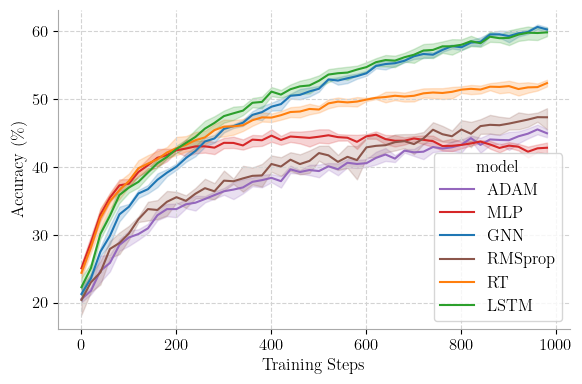

In [170]:
included_models = ['ADAM', 'RMSprop', 'RT', 'GNN', "LSTM", "MLP"]
simple_lineplot(trained_on, 11, included_models)

### Section Improvement

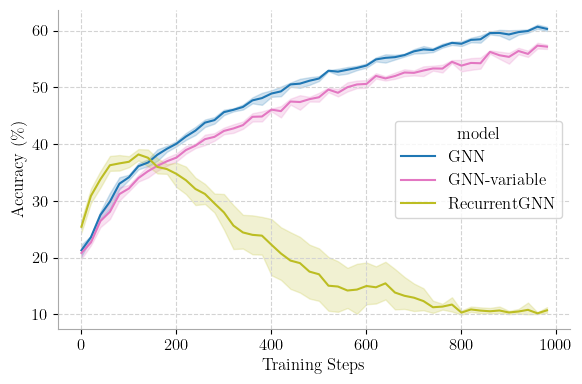

In [171]:
included_models = ["GNN-variable", "GNN", "RecurrentGNN"]
simple_lineplot(trained_on, 11, included_models)

### Section Generalization Experiments

#### Prepare the Data

In [172]:

# only include train = 

# included_models = ['ADAM', 'RMSprop', 'RT', 'GNN', "LSTM", "MLP"]
# test_tasks = ["test=11", "test=15", "test=20"]
# trained_on = 17
# complexity_subset = all_results[
#         (all_results["train_task"] == f"train={trained_on}") &
#         (all_results["model"].isin(included_models))
#     ]

# # can you make a lineplot for each test task side by side share y axis
# fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# for i, test_task in enumerate(test_tasks):
#     task_data = complexity_subset[complexity_subset["test_task"] == test_task]
    
#     sns.lineplot(data=task_data, x="step", y="accuracy", hue="model", 
#                  markers=True, dashes=False, ax=axes[i])
    
#     axes[i].set_title(f"Test Task {test_task.split('=')[1]}")
#     axes[i].set_xlabel("Training Steps")
    
#     if i == 0:  # Only add y-label to the first subplot
#         axes[i].set_ylabel("Accuracy (\%)")
#     else:
#         axes[i].set_ylabel("")
    
#     axes[i].grid(True, linestyle='--', alpha=0.7)
#     sns.despine(ax=axes[i])
    
#     # Remove legend from all but the last plot


# plt.tight_layout()
# plt.savefig(f"comparison_train={trained_on}_complexity.pdf", dpi=300, bbox_inches='tight')
# plt.show()





In [173]:
included_models = ['ADAM', 'RMSprop', 'RT', 'GNN', "LSTM", "MLP"]
test_tasks = [11, 19, 20, 21, 22, 23, 24, 25, 26,]
test_tasks = [f"test={task}" for task in test_tasks]


trained_on = 17
complexity_subset = all_results[
        (all_results["train_task"] == f"train={trained_on}") &
        (all_results["test_task"].isin(test_tasks)) &
        (all_results["model"].isin(included_models))
    ]


dim_mapping = {
    # standard tasks
    "test=11": 32,

    # varying dimensions
    "test=19": 8,
    "test=20": 16,
    "test=21": 64,
    "test=22": 128,

    # other tasks
    "test=23": 32,
    "test=24": 32,
    "test=25": 32,
    "test=26": 32,
}

layer_mapping = {
    # standard tasks
    "test=11": 3,

    # varying layers
    "test=23": 1,
    "test=24": 2,
    "test=25": 4,
    "test=26": 5,

    # other tasks
    "test=11": 3,
    "test=19": 3,
    "test=20": 3,
    "test=21": 3,
    "test=22": 3,
    }


complexity_subset["num_layers"] = complexity_subset["test_task"].map(layer_mapping)
complexity_subset["num_dimensions"] = complexity_subset["test_task"].map(dim_mapping)
complexity_subset

complexity_subset["log_num_dimensions"] = np.log2(complexity_subset["num_dimensions"])

# only keep last step
complexity_subset = complexity_subset[complexity_subset["step"] == complexity_subset["step"].max()]

/var/folders/l7/k9q4xx6n4lx0nfwlg_qh8wl00000gn/T/ipykernel_48626/2526548213.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complexity_subset["num_layers"] = complexity_subset["test_task"].map(layer_mapping)
/var/folders/l7/k9q4xx6n4lx0nfwlg_qh8wl00000gn/T/ipykernel_48626/2526548213.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complexity_subset["num_dimensions"] = complexity_subset["test_task"].map(dim_mapping)
/var/folders/l7/k9q4xx6n4lx0nfwlg_qh8wl00000gn/T/ipykernel_48626/2526548213.py:54: S

In [174]:
# check some data
subset = complexity_subset[complexity_subset["model"] == "MLP"]
subset

,train_task,test_task,model,step,seed,accuracy,num_layers,num_dimensions,log_num_dimensions
599,train=17,test=11,MLP,980.0,seed_0,43.11,3,32,5.0
649,train=17,test=11,MLP,980.0,seed_1,42.77,3,32,5.0
699,train=17,test=11,MLP,980.0,seed_2,42.94,3,32,5.0
749,train=17,test=11,MLP,980.0,seed_3,41.32,3,32,5.0
799,train=17,test=11,MLP,980.0,seed_4,44.12,3,32,5.0


### Dimensions

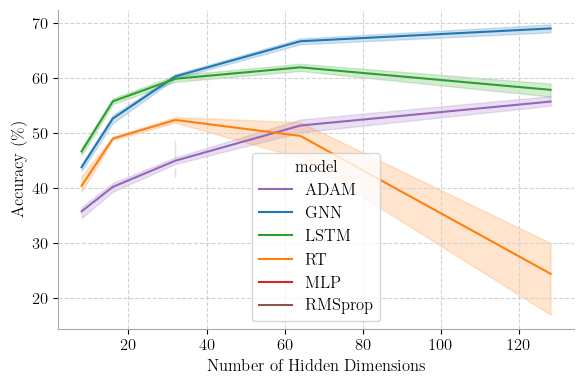

In [175]:

dimension_tasks =   ["test=11", "test=19", "test=20", "test=21", "test=22"]
dimension_subset = complexity_subset[complexity_subset["test_task"].isin(dimension_tasks)]
dimension_subset = dimension_subset.sort_values(by=["num_dimensions", "model"])


plt.figure(figsize=(6, 4))
sns.lineplot(data=dimension_subset, x="num_dimensions", y="accuracy", hue="model", palette=colors,)
plt.xlabel("Number of Hidden Dimensions")
plt.ylabel("Accuracy (\%)")
# save it
sns.despine()
plt.tight_layout()
plt.savefig(f"plots/performance_across_dimensions.pdf", dpi=300, bbox_inches='tight')
# plt.title(f"Training on Task {trained_on} and Testing on Task {tested_in}")



   num_dimensions  accuracy
0               8    35.790
1              16    40.232
2              32    44.986
3              64    51.376
4             128    55.728
  train_task test_task model   step    seed  accuracy  num_layers  \
0   train=17   test=19   GNN  980.0  seed_0     44.57           3   
1   train=17   test=19   GNN  980.0  seed_1     44.37           3   
2   train=17   test=19   GNN  980.0  seed_2     43.84           3   
3   train=17   test=19   GNN  980.0  seed_3     43.79           3   
4   train=17   test=19   GNN  980.0  seed_4     42.51           3   

   num_dimensions  log_num_dimensions  accuracy_adam  
0               8                 3.0          35.79  
1               8                 3.0          35.79  
2               8                 3.0          35.79  
3               8                 3.0          35.79  
4               8                 3.0          35.79  


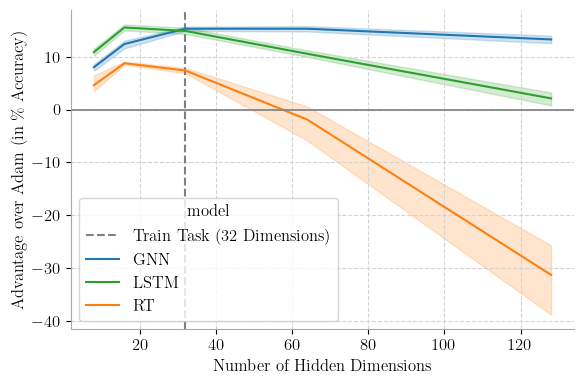

In [183]:
# average performance of ADAM for all number of layers
avg_adam_per_dim = dimension_subset[dimension_subset["model"] == "ADAM"].groupby("num_dimensions")["accuracy"].mean().reset_index()
print(avg_adam_per_dim)

diff_data = dimension_subset.copy()

included = ["LSTM", "GNN", "RT"]
diff_data = diff_data[diff_data["model"].isin(included)]

# subtract adam performance from model accuracy matching by dimensions
diff_data = diff_data.merge(avg_adam_per_dim, on="num_dimensions", suffixes=("", "_adam"))
print(diff_data.head())
diff_data["performance_advantage"] = diff_data["accuracy"] - diff_data["accuracy_adam"]
diff_data = diff_data[["num_dimensions", "model", "performance_advantage"]]



plt.figure(figsize=(6, 4))
plt.axvline(x=32, color='gray', linestyle='--', label='Train Task (32 Dimensions)')
sns.lineplot(data=diff_data, x="num_dimensions", y="performance_advantage", hue="model", palette=colors,)
plt.xlabel("Number of Hidden Dimensions")
plt.ylabel("Advantage over Adam (in \% Accuracy)")

plt.axhline(y=0, color='gray', linestyle='-', linewidth=1.2)  # Add a horizontal line at y=0
# save it
sns.despine()
plt.tight_layout()
plt.savefig(f"plots/diff_plot_hidden_dimensions.pdf", dpi=300, bbox_inches='tight')
# plt.title(f"Training on Task {trained_on} and Testing on Task {tested_in}")


### Layers

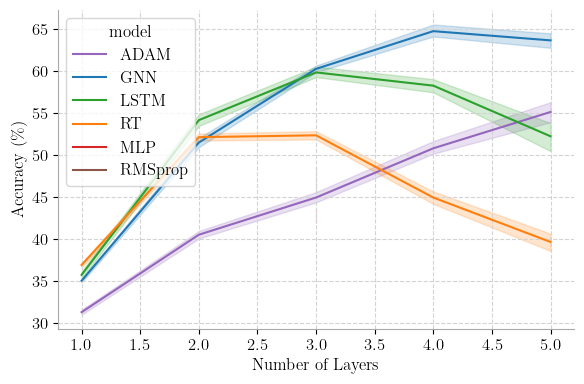

In [177]:
layer_tasks =   ["test=11", "test=23", "test=24", "test=25", "test=26"]
layer_subset = complexity_subset[complexity_subset["test_task"].isin(layer_tasks)]
layer_subset = layer_subset.sort_values(by=["num_layers", "model"])


plt.figure(figsize=(6, 4))

sns.lineplot(data=layer_subset, x="num_layers", y="accuracy", hue="model", palette=colors,)


plt.xlabel("Number of Layers")
plt.ylabel("Accuracy (\%)")
# save it
sns.despine()
plt.tight_layout()
plt.savefig(f"plots/performance_across_layers.pdf", dpi=300, bbox_inches='tight')
# plt.title(f"Training on Task {trained_on} and Testing on Task {tested_in}")


   num_layers  accuracy
0           1    31.344
1           2    40.560
2           3    44.986
3           4    50.844
4           5    55.166
  train_task test_task model   step    seed  accuracy  num_layers  \
0   train=17   test=23   GNN  980.0  seed_0     35.09           1   
1   train=17   test=23   GNN  980.0  seed_1     35.32           1   
2   train=17   test=23   GNN  980.0  seed_2     34.81           1   
3   train=17   test=23   GNN  980.0  seed_3     34.92           1   
4   train=17   test=23   GNN  980.0  seed_4     35.29           1   

   num_dimensions  log_num_dimensions  accuracy_adam  
0              32                 5.0         31.344  
1              32                 5.0         31.344  
2              32                 5.0         31.344  
3              32                 5.0         31.344  
4              32                 5.0         31.344  


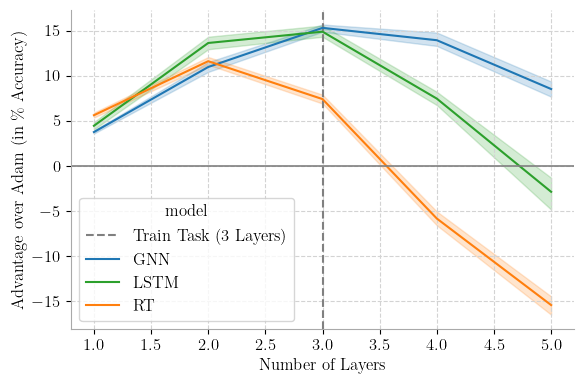

In [178]:
# average performance of ADAM for all number of layers
avg_adam_per_dim = layer_subset[layer_subset["model"] == "ADAM"].groupby("num_layers")["accuracy"].mean().reset_index()
print(avg_adam_per_dim)

diff_data = layer_subset.copy()

included = ["LSTM", "GNN", "RT"]
diff_data = diff_data[diff_data["model"].isin(included)]

# subtract adam performance from model accuracy matching by dimensions
diff_data = diff_data.merge(avg_adam_per_dim, on="num_layers", suffixes=("", "_adam"))
print(diff_data.head())
diff_data["performance_advantage"] = diff_data["accuracy"] - diff_data["accuracy_adam"]
diff_data = diff_data[["num_layers", "model", "performance_advantage"]]




plt.figure(figsize=(6, 4))
plt.axvline(x=3, color='gray', linestyle='--', label='Train Task (3 Layers)')
sns.lineplot(data=diff_data, x="num_layers", y="performance_advantage", hue="model", palette=colors,)
plt.xlabel("Number of Layers")
plt.ylabel("Advantage over Adam (in \% Accuracy)")
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1.2)  # Add a horizontal line at y=0
# save it
sns.despine()
plt.tight_layout()
plt.savefig(f"plots/diff_plot_layers.pdf", dpi=300, bbox_inches='tight')
# plt.title(f"Training on Task {trained_on} and Testing on Task {tested_in}")